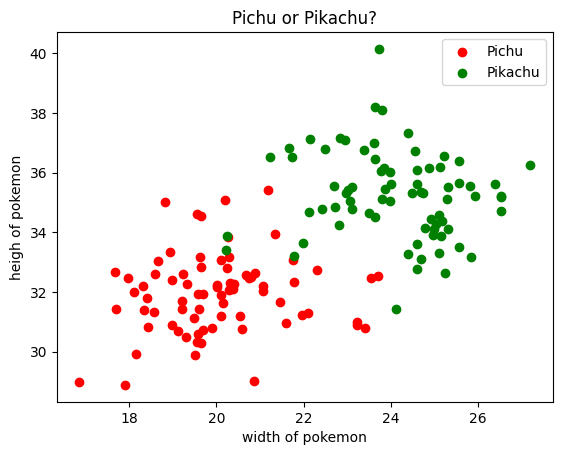

Sample with width and height: (25, 32) classified as Pikachu
Sample with width and height: (24.2, 31.5) classified as Pikachu
Sample with width and height: (22, 34) classified as Pikachu
Sample with width and height: (20.5, 34) classified as Pichu
Sample with width and height: (25, 32) classified as Pikachu
Sample with width and height: (24.2, 31.5) classified as Pikachu
Sample with width and height: (22, 34) classified as Pikachu
Sample with width and height: (20.5, 34) classified as Pichu


ValueError: Please enter positive numbers

In [2]:
import numpy as np
from ast import literal_eval
import re
import matplotlib.pyplot as plt

#Read data and save them in an appropriate data structure
def get_data(): 
    piches = []
    pikaches = []
    with open ("datapoints.txt", 'r') as file: 
        data = file.readlines() [1: ]
       
        for line in data:
             x, y, c = map (float, line.split(', '))
             if c==0:
                piches.append ((x, y, int(c)))
             else:    
                pikaches.append ((x, y, int(c)))
                
    return piches, pikaches               
piches, pikaches = get_data ()


#Plot datapoints, each class with its own color  
plt.scatter ([x[0] for x in piches], [y[1] for y in piches], label="Pichu", color='red' )
plt.scatter ([x[0] for x in pikaches], [y[1] for y in pikaches], label="Pikachu",color='green' )
plt.legend ()  
plt.title ("Pichu or Pikachu?")
plt.xlabel ("width of pokemon")
plt.ylabel ("heigh of pokemon")
plt.show ()

#Transformation of test data textfile. We need to extract a comma-separated list of values enclosed within parentheses from a file
#Raphael's with help of Regular expressions. We have obtained 4 test points as a list variable.

def get_test ():
    testp = []
    with open ("testpoints.txt", 'r') as file:
        rstr=r"(\(.+, .+\))"
        test= file.read()
        for tupl in re.findall(rstr, test):
            testp += [literal_eval(tupl)]
    return testp
testp= get_test()
  

#Function to calculate shortest distance beetween two points (training data and test/query points)

def eucd(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    

# K-Nearest Neihbors Algoritm:    
# Function to classify nearest neighbors, compute the distance from test point to all points in training data//
# Sort the training points in ascending order according to distance to test point.
# Define the  function  to classify nearest neighbors by class they belong

pokemons= piches + pikaches # all training data 

def classify (point, pokemons, k):
    distances = []
    for p in pokemons:
        dist = eucd(point, p)  
        distances.append((p, dist))
        
    # to find closest pokemons, we sort the list of tuples by the distance in ascending order.
    distances.sort(key=lambda tup: tup[1])
    
    # then we need to find majority vote for each class among k tested neihbors: 
    k_nearest_neighbors = distances[:k]  
    pichu_vote = 0
    pikachu_vote = 0
    for neighbor, _ in k_nearest_neighbors:
        if neighbor in piches:
            pichu_vote += 1
        else:
            pikachu_vote+= 1
    if pichu_vote > pikachu_vote:
        return "Pichu"
    else:
        return "Pikachu"
    
    # To find closest neighbor, we run K-NN algoritm with a value of k=1.
for point in testp:
    result = classify (point, pokemons, k=1)  
    print (f"Sample with width and height: {point} classified as {result}")


# Classify test points for 10 nearest neighbors:
for point in testp:
    result = classify (point, pokemons, k=10)  
    print (f"Sample with width and height: {point} classified as {result}")

    
#Let user input testpoint and define its class. Take care of error handling.

def query():
    while True:
                try:
                    inp= input ("Please give a weight and height of your pokemon (uw, uh): ")
                    uw, uh = literal_eval (inp)
                    if uw<0 or uh<0:
                        raise ValueError ("Please enter positive numbers" )
                    return uw, uh
                except (TypeError, TypeError, SyntaxError):
                    print("Please enter two positive numbers as dimensions of your pokemon")
                break   
user_input=query()
user_result= classify (user_input, pokemons, k=1)  
print (f"Your pokemon with width and height: {user_input} classified as {user_result}")
                
                
                    
            